<h1>Tarea 2</h1>
<h2>Fidel Alejandro Navarro Salazar</h2>

<h3>Objetivos:</h3>
Utilizar  un  generador  de númerosaleatorios  para  obtener (a)  secuencias  de númerospara  señalar  sus característicasestadísticasy (b) una configuracióninicial de un sistema en 2D y otro en 3D, dados los parámetrossuficientes para su implementación.

<h3>Actividad 1</h3>
Elaborar  un  programapara  generar  números  aleatorios de  acuerdo  con  elsiguiente algoritmo:

$x_n=(5x_{n-1}+1)mod(16)$

El programa deberá incluir:

(a) La lectura por pantalla de la semilla y la salida como una tabla de dos columnas ($n$ y $x_n$), para $n=1,2,...,100$. Hacerlo para tres semillas diferentes.

(b) Reposrta en cada caso de $(i)$ las características de la secuencia de números aleatorios.

In [45]:
#Importamos las librarias a utilizar.
import pandas as pd
import numpy as np
from numba import jit, vectorize

In [49]:
#Definimos una función que nos genere número aleatorios.
@jit
def rand(X0,m,a,c):
    #n tomara valores de 1 a 100 
    n = []
    X = [] 
    i=1
    while i<101:
        if i==1:
            Xn=(a*X0+c)%m
            X.append(Xn)
        else:
            Xn=(a*X[i-2]+c)%m
            X.append(Xn)
        n.append(i)
        i=i+1
    #Hacemos una tabla con los valores
    df1=pd.DataFrame({
        "n" : n,
        "x" : X
    })        
    return df1

Llamaremos la funcion para tres semillas diferentes.

Las semillas serán $i=2, 5, 7$.

Cada semilla sera evaluada y posteriormente visualizaremos los valores obtenidos en una tabla.

In [51]:
s_2=rand(2,16,5,1)
#Mostramos los primeros 20 números
s_2.head(20)

,n,x
0,1,11
1,2,8
2,3,9
3,4,14
4,5,7
5,6,4
6,7,5
7,8,10
8,9,3
9,10,0


Para la semilla $i=2$ tenemos que después de 17 números la secuencia se repite.

In [17]:
s_5=rand(5,16,5,1)
#Mostramos los primeros 20 números
s_5.head(20)

,n,x
0,1,10
1,2,3
2,3,0
3,4,1
4,5,6
5,6,15
6,7,12
7,8,13
8,9,2
9,10,11


Similarmente, para la semilla $i=5$ tenemos que después de 17 números la secuencia se repite.

In [18]:
s_7=rand(7,16,5,1)
#Mostramos los primeros 20 números
s_7.head(20)

,n,x
0,1,4
1,2,5
2,3,10
3,4,3
4,5,0
5,6,1
6,7,6
7,8,15
8,9,12
9,10,13


Por último, para la semilla $a=5$ tenemos que después de 17 números la secuencia se repite.

<h3>Actividad 2</h3>
Elaborar un programa para generar números aleatorios con el generador que incluye su compilador.

El programa deberá incluir:

(a) La lectura de la semilla y la salida por pantalla de dos columnas ($n$ y $x_n$), para $n=1,2,...,100$.

(b) La lectura por pantalla de dos semillas y la salida en un archivo de dos columnas ($x_n$, $y_n$), donde $x_n$ y $y_n$ son números aleatorios. Hacerlo para 100, 1000 y 10000 parejas de números aleatorios.

(c) Graficar el resultado obtenido para los tres casos de (b). 

In [24]:
#Importamos la biblioeca a utilizar
import random as rd

In [25]:
#Creamos una función que nos genere una lista de "n" números a aleatorios con una semilla "s" generados mediante la biblioteca "random" de Python.
@jit
def seed(s,n):
    N=[]
    x=[]
    rd.seed(s)
    for i in range(n):
        N.append(i+1)
        x.append(rd.random())
    df1=pd.DataFrame({
        "n" : N,
        "x" : x
    })        
    return df1

(a) Generamos una tabla con n=100 números aleatorios y una semilla de s=5

In [27]:
s_a=seed(5,100)
s_a

,n,x
0,1,0.622902
1,2,0.741787
2,3,0.795194
3,4,0.942450
4,5,0.739899
...,...,...
95,96,0.148868
96,97,0.689175
97,98,0.996727
98,99,0.161529


(b) Gemeraremos tres tablas y archivos con dos columnas de números aleatorios $x_n$ y $y_n$ para $n=100, 1000, 10000$

In [28]:
#Establecemos el valor de la semilla para x_n y y_n.
sx=7
sy=10

In [29]:
#Calculamos las respectivas listas de valores aleatorios para x_n y y_n.
x_100 = seed(sx,100)
x_1000 = seed(sx,1000)
x_10000 = seed(sx,10000)

y_100 = seed(sy,100)
y_100 = y_100.rename(columns={'x': 'y'})
y_1000 = seed(sy,1000)
y_1000 = y_1000.rename(columns={'x': 'y'})
y_10000 = seed(sy,10000)
y_10000 = y_10000.rename(columns={'x': 'y'})

#Creamos una sola tabla para cada x_n y y_n
#Como tanto la tabla de x_n y y_n tienen una columna llamada "n" podemos eleminarla de y_n antes de combinar ambas tablas para evitar tener las columnas repetidas.
y_100.drop(["n"], axis=1)
y_1000.drop(["n"], axis=1)
y_10000.drop(["n"], axis=1)

#Combinamos ambas tablas
xy_100 = pd.concat([x_100, y_100], axis=1)
xy_1000 = pd.concat([x_1000, y_1000], axis=1)
xy_10000 = pd.concat([x_10000, y_10000], axis=1)

#Guardamos los datos en 3 archivos .csv
xy_100.to_csv("xy_100.csv",index=False)
xy_1000.to_csv("xy_1000.csv",index=False)
xy_10000.to_csv("xy_10000.csv",index=False)

(c) Graficamos los números aleatorios guardados en los archivos csv

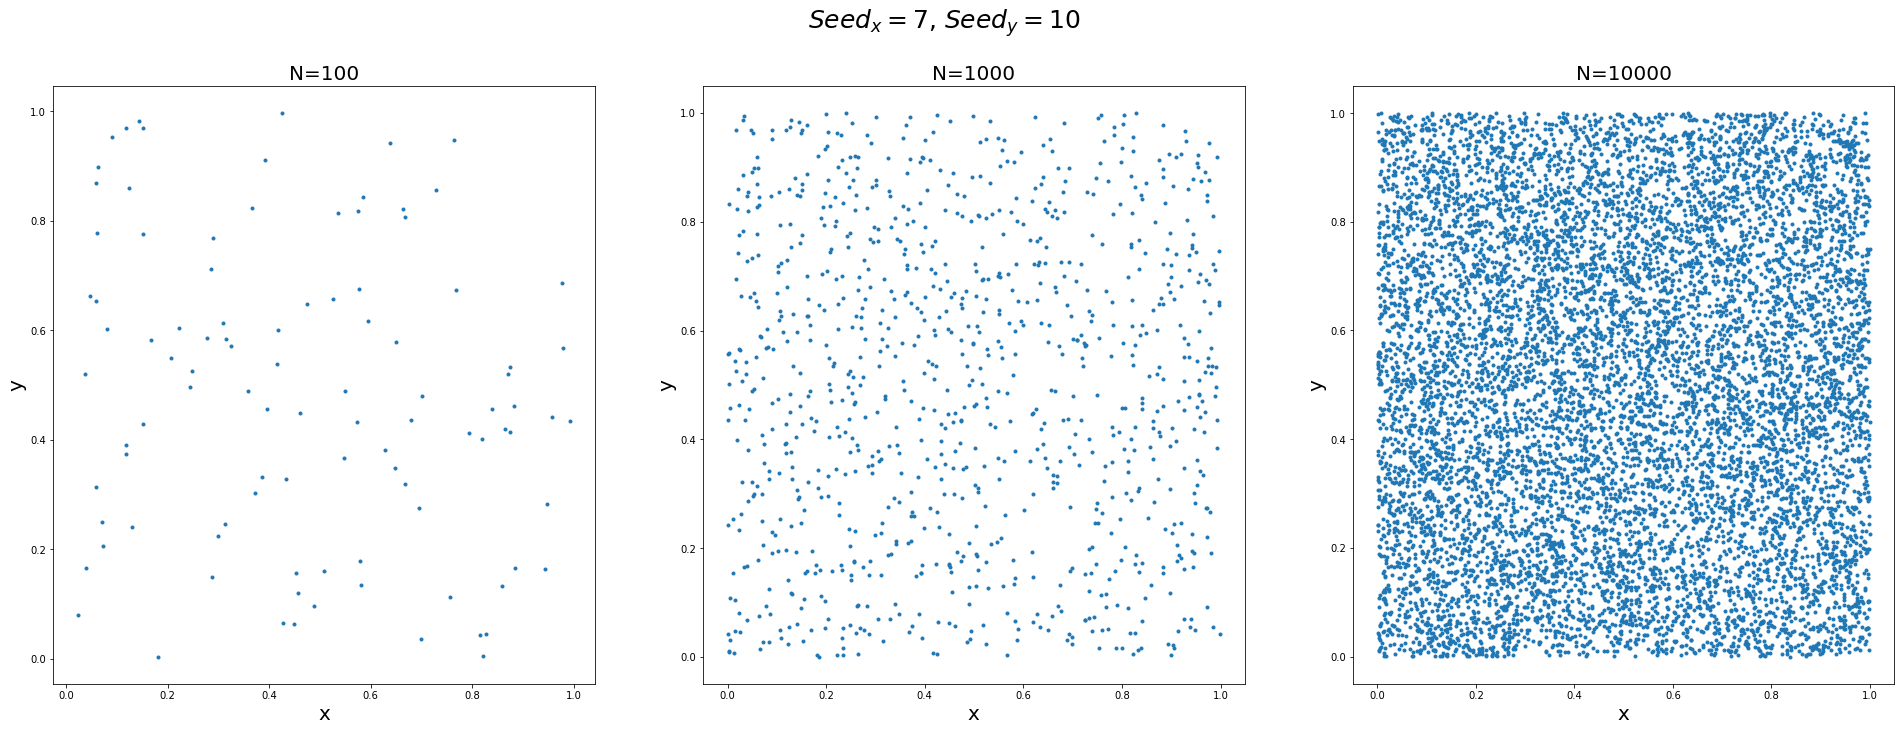

In [31]:
#Importamos las bibliotecas a utiilizar
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

#Se graficaran las funciones obtenidas
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_size_inches(33, 11)

fig.suptitle("$Seed_x=7$, $Seed_y =10$", size=25)

ax1.plot(xy_100["x"], xy_100["y"], ".")
ax1.set_title("N=100", size=20)
ax1.set_ylabel("y", size=20)
ax1.set_xlabel("x", size=20)

ax2.plot(xy_1000["x"], xy_1000["y"], ".")
ax2.set_title("N=1000", size=20)
ax2.set_ylabel("y", size=20)
ax2.set_xlabel("x", size=20)

ax3.plot(xy_10000["x"], xy_10000["y"], ".")
ax3.set_title("N=10000", size=20)
ax3.set_ylabel("y", size=20)
ax3.set_xlabel("x", size=20)



plt.show()

<h3>Actividad 3</h3>
Configuración inicial aleatoria bidimensional.

Implementar un código para construir una configuración inicial aleatoria bidimensional sin translapes. Ejecutar su programa para obtener configuraciones iniciales para los casos siguientes.

(a) Concentración reducida fija en $n*=0.4$ y $N=100,500, 1000$ partículas.

(b) Número de partículas fijo en $N=500$ y $n*=0.2,0.6,0.8$.

En cada caso:

(i) Incluir códifo de la instrucción que lleve a mostrar la longitud de la celda de simulación

(ii) Mostrar gráficamente la distribución de partículas obtenidas donde se aprecie con claridad la longotud de la celda correspondiente.

Debido a que la celda es bidimensional tenemos que su longitud reducida $L*$ esta dada por:

$L*=\sqrt{\frac{N}{n*}}$

Por otro lado, su fracción de área $A*$ esta dado por:

$A*=\frac{Na}{A}=\frac{N}{A}(\frac{\pi d^2}{4})=n(\frac{\pi d^2}{4})=\frac{\pi n*}{4}$

donde $d$ es el diámetro de la partícula.

In [32]:
#La longitud reducida esta dado por la función
#L_bin(concentración reducida, número de partículas)
@jit
def L_bi(n,N,dim):
    if dim==2:
        return (np.sqrt(N/n))
    else:
        return ((N/n)**(1./3))

#La fracción de área esta dada por la función
@jit
def A_f(n,dim):
    if dim==2:
        return (np.pi*n/4)
    else:
        return (np.pi*n/6)
    
#El radio de la partícula esta dado por la función
@jit
def rad(A,dim):
    if dim==2:
        return (np.sqrt(A/np.pi))
    else:
        return ( (  3*A/(4*np.pi) )**(1./3) )

#Creamos una función que nos diga si dos circulos se intersectan 
@jit
def intersec(x0, y0, z0, x1, y1, z1, r):
    d = np.sqrt((x1-x0)**2 + (y1-y0)**2 + (z1-z0)**2)
    if d <= 2*r:
        return 0
    else:
        return 1

In [59]:
#Creamos una función que nos de las posiciones de nuestras partículas
#Esta función es general para 2 o 3 dimensiones
@jit
def caja(s,n,N,dim):

    z = []
    x = []
    y = []
    rd.seed(s)
    #Llamamos a la funciones declaradas para calcular la longitud, Área/Volumen y Radio
    L = L_bi(n,N,dim)
    A = A_f(n,dim)
    r = rad(A,dim)
    i=0
    #Calculamos la posición de cada partícula
    while i < N:
        k=0
        #Calculamos el valor de la primera partícula de forma directa ya que no hay otra posición con cual compararla
        if i==0:
            x.append(rd.uniform(0,L))
            y.append(rd.uniform(0,L))
            #Incorporamos un condicional para el caso de 2 o 3 dimensiones
            if dim==2:
                z.append(0)
            else:
                z.append(rd.uniform(0,L))
            #Al terminar aumentamos el contador para continuar con el resto de las posiciones
            i=i+1
        #Si ya no estamos calculando la primera partícula calculamos la posición de las demas por medio de este Else
        else:
            #Generamos valores de prueba para la posición de la partícula
            x_p=rd.uniform(0,L)
            y_p=rd.uniform(0,L)
            #Condicional para 2 o 3 dimensiones
            if dim==2:
                z_p=0
            else:
                z_p=rd.uniform(0,L)
            
            #En este ciclo comparamos la posición prueba de nuestra partícula con las posiciones de las partículas anteriores
            for j in range(i):
                #Llamamos a la función que nos calcula la intersección entre dos partículas, si hay intersección nos regresa un cero
                #Cada IF revisa si existe una intersección con la partícula y las vecinas, incluyendo a las que se encuentran en las celdas imagen
                if (intersec(x_p, y_p, z_p, x[j], y[j], z[j], r)==0):
                    #Esta variable nos permite llevar la cuenta de cuantas veces se a repetido la posición de la partícula
                    k=k+1
                    #Esta instrucción nos permite salir del if si se cumple la condición de que dos partículas se intersectan
                    break
                elif (intersec(x_p, y_p, z_p, x[j]+L, y[j], z[j], r)==0):
                    k=k+1
                    break
                elif (intersec(x_p, y_p, z_p, x[j]-L, y[j], z[j], r)==0):
                    k=k+1
                    break
                elif (intersec(x_p, y_p, z_p, x[j], y[j]+L, z[j], r)==0):
                    k=k+1
                    break
                elif (intersec(x_p, y_p, z_p, x[j], y[j]-L, z[j], r)==0):
                    k=k+1
                    break
                elif (intersec(x_p, y_p, z_p, x[j]+L, y[j]+L, z[j], r)==0):
                    k=k+1
                    break
                elif (intersec(x_p, y_p, z_p, x[j]-L, y[j]+L, z[j], r)==0):
                    k=k+1
                    break
                elif (intersec(x_p, y_p, z_p, x[j]+L, y[j]-L, z[j], r)==0):
                    k=k+1
                    break
                elif (intersec(x_p, y_p, z_p, x[j]-L, y[j]-L, z[j], r)==0):
                    k=k+1
                    break
                #Para 3 dimensiones
                if dim==3:
                    if (intersec(x_p, y_p, z_p, x[j], y[j], z[j]+L, r)==0):
                        k=k+1
                        break
                    elif (intersec(x_p, y_p, z_p, x[j]+L, y[j], z[j]+L, r)==0):
                        k=k+1
                        break
                    elif (intersec(x_p, y_p, z_p, x[j]-L, y[j], z[j]+L, r)==0):
                        k=k+1
                        break
                    elif (intersec(x_p, y_p, z_p, x[j], y[j]+L, z[j]+L, r)==0):
                        k=k+1
                        break
                    elif (intersec(x_p, y_p, z_p, x[j], y[j]-L, z[j]+L, r)==0):
                        k=k+1
                        break
                    elif (intersec(x_p, y_p, z_p, x[j]+L, y[j]+L, z[j]+L, r)==0):
                        k=k+1
                        break
                    elif (intersec(x_p, y_p, z_p, x[j]-L, y[j]+L, z[j]+L, r)==0):
                        k=k+1
                        break
                    elif (intersec(x_p, y_p, z_p, x[j]+L, y[j]-L, z[j]+L, r)==0):
                        k=k+1
                        break
                    elif (intersec(x_p, y_p, z_p, x[j]-L, y[j]-L, z[j]+L, r)==0):
                        k=k+1
                        break
                    elif (intersec(x_p, y_p, z_p, x[j], y[j], z[j]-L, r)==0):
                        k=k+1
                        break
                    elif (intersec(x_p, y_p, z_p, x[j]+L, y[j], z[j]-L, r)==0):
                        k=k+1
                        break
                    elif (intersec(x_p, y_p, z_p, x[j]-L, y[j], z[j]-L, r)==0):
                        k=k+1
                        break
                    elif (intersec(x_p, y_p, z_p, x[j], y[j]+L, z[j]-L, r)==0):
                        k=k+1
                        break
                    elif (intersec(x_p, y_p, z_p, x[j], y[j]-L, z[j]-L, r)==0):
                        k=k+1
                        break
                    elif (intersec(x_p, y_p, z_p, x[j]+L, y[j]+L, z[j]-L, r)==0):
                        k=k+1
                        break
                    elif (intersec(x_p, y_p, z_p, x[j]-L, y[j]+L, z[j]-L, r)==0):
                        k=k+1
                        break
                    elif (intersec(x_p, y_p, z_p, x[j]+L, y[j]-L, z[j]-L, r)==0):
                        k=k+1
                        break
                    elif (intersec(x_p, y_p, z_p, x[j]-L, y[j]-L, z[j]-L, r)==0):
                        k=k+1
                        break

            #Si se repitio la posición de la partícula cambiamos nuestra semilla y volvemos a calcular la posición de la partícula
            if k != 0:                    
                s=s+0.1
                rd.seed(s)
            #Si el valor no se repitio guardamos el valor prueba en nuestra lista
            elif i !=0:
                x.append(x_p)
                y.append(y_p)
                z.append(z_p)
                #Aumentamos el valor de este contador para pasar a la siguiente partícula
                i=i+1  
    #Si estamos trabajando en 2 dimensiones guardamos solo los valores de X y Y
    if dim==2:     
        df1=pd.DataFrame({
            "x" : x,
            "y" : y
        })        
    #Si trabajamos en 3 dimensiones guradamos todos los valores
    else:
        df1=pd.DataFrame({
            "x" : x,
            "y" : y,
            "z" : z
        }) 
    #Regresamos la tabla
    return df1

a) Gráficos para concentración reducida fija en $n*=0.4$ y $N=100, 500, 1000$.

In [61]:
#Valores para n*=0.4
#con N=100
n100 = caja(3,0.4,100,2)
#con N=500
n500 = caja(3,0.4,500,2)
#con N=1000
n1000 = caja(3,0.4,1000,2)

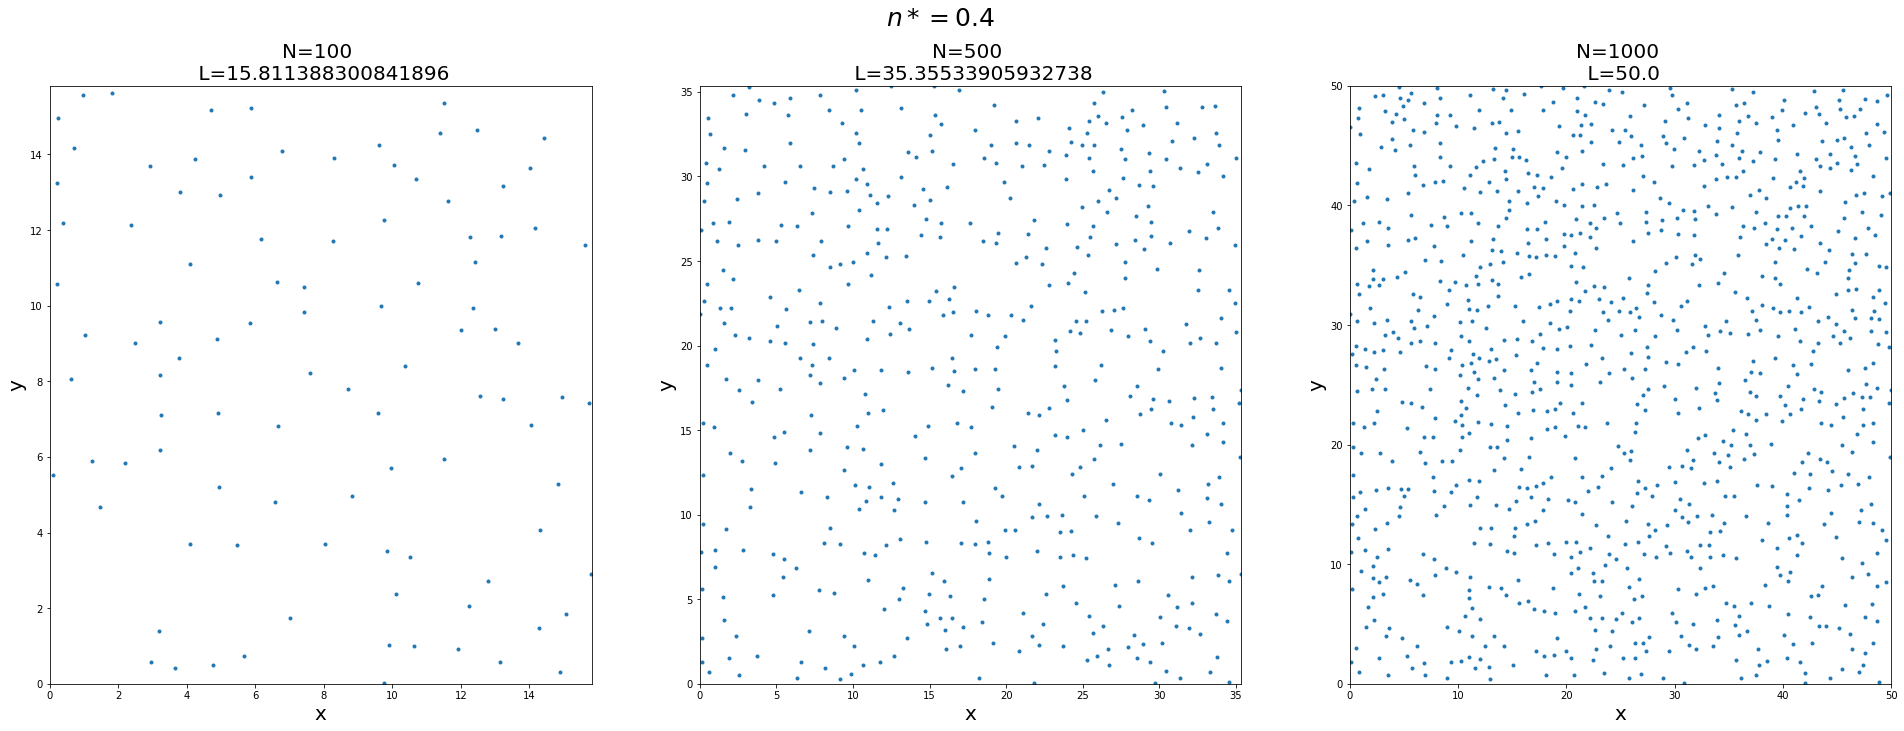

In [38]:
#Se graficaran las funciones obtenidas
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_size_inches(33, 11)

fig.suptitle("$n*=0.4$", size=25)

ax1.plot(n100["x"], n100["y"], ".")
ax1.set_title("N=100 \n L="+str(L_bi(0.4,100,2)), size=20)
ax1.set_ylabel("y", size=20)
ax1.set_xlabel("x", size=20)
ax1.set_xlim(0,L_bi(0.4,100,2))
ax1.set_ylim(0,L_bi(0.4,100,2))

ax2.plot(n500["x"], n500["y"], ".")
ax2.set_title("N=500 \n L="+str(L_bi(0.4,500,2)), size=20)
ax2.set_ylabel("y", size=20)
ax2.set_xlabel("x", size=20)
ax2.set_xlim(0,L_bi(0.4,500,2))
ax2.set_ylim(0,L_bi(0.4,500,2))

ax3.plot(n1000["x"], n1000["y"], ".")
ax3.set_title("N=1000 \n L="+str(L_bi(0.4,1000,2)), size=20)
ax3.set_ylabel("y", size=20)
ax3.set_xlabel("x", size=20)
ax3.set_xlim(0,L_bi(0.4,1000,2))
ax3.set_ylim(0,L_bi(0.4,1000,2))



plt.show()

b) Gráficas para número de partículas fijo en $N=500$ y $n*= 0.2,0.6,0.8$.

In [39]:
#Valores para N=500
#con n*=0.2
n02 = caja(3,0.2,500,2)
#con n*=0.6
n06 = caja(3,0.6,500,2)
#con n*=0.8
n08 = caja(3,0.8,500,2)

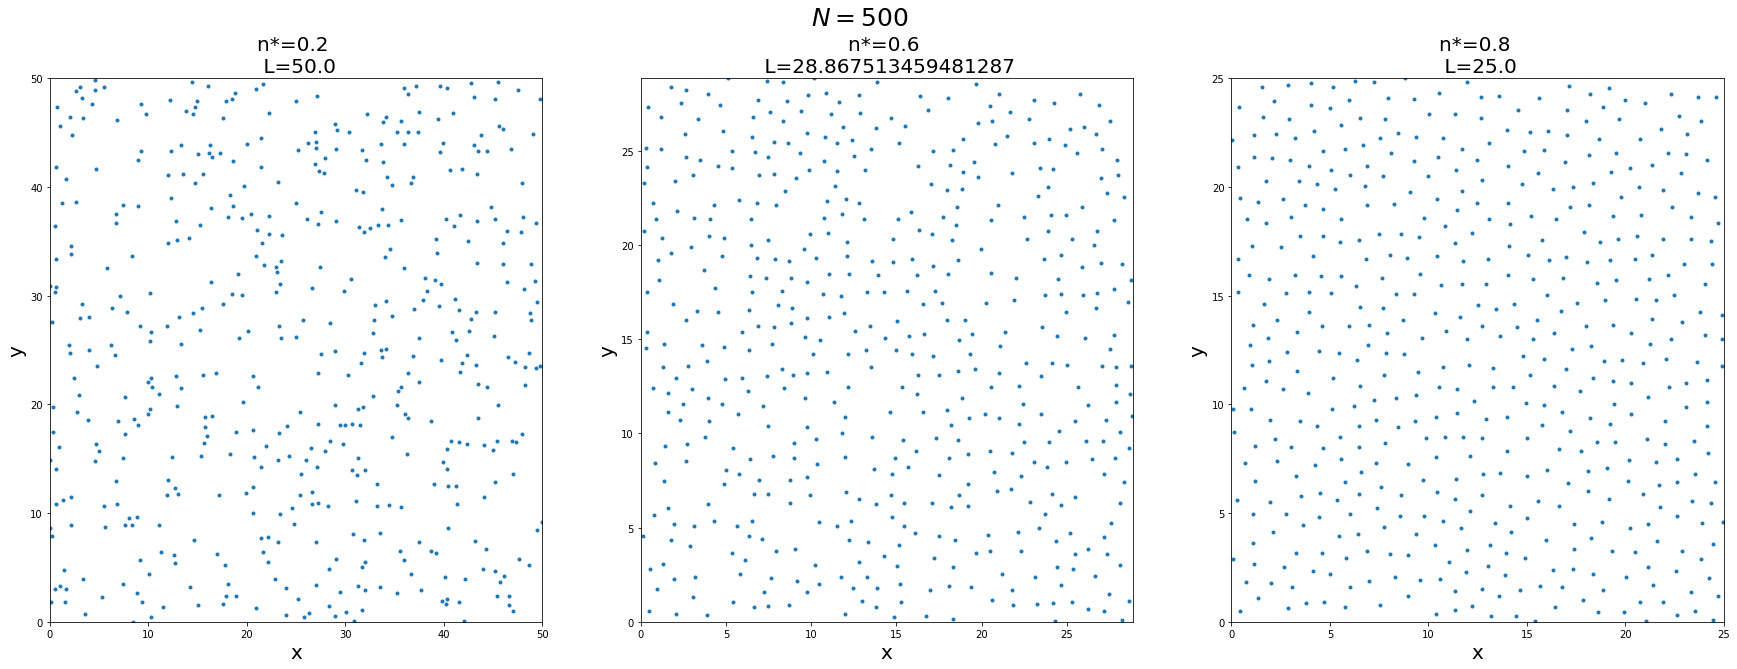

In [40]:
#Se graficaran las funciones obtenidas
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_size_inches(30, 10)

fig.suptitle("$N=500$", size=25)

ax1.plot(n02["x"], n02["y"], ".")
ax1.set_title("n*=0.2 \n L="+str(L_bi(0.2,500,2)), size=20)
ax1.set_ylabel("y", size=20)
ax1.set_xlabel("x", size=20)
ax1.set_xlim(0,L_bi(0.2,500,2))
ax1.set_ylim(0,L_bi(0.2,500,2))

ax2.plot(n06["x"], n06["y"], ".")
ax2.set_title("n*=0.6 \n L="+str(L_bi(0.6,500,2)), size=20)
ax2.set_ylabel("y", size=20)
ax2.set_xlabel("x", size=20)
ax2.set_xlim(0,L_bi(0.6,500,2))
ax2.set_ylim(0,L_bi(0.6,500,2))

ax3.plot(n08["x"], n08["y"], ".")
ax3.set_title("n*=0.8 \n L="+str(L_bi(0.8,500,2)), size=20)
ax3.set_ylabel("y", size=20)
ax3.set_xlabel("x", size=20)
ax3.set_xlim(0,L_bi(0.8,500,2))
ax3.set_ylim(0,L_bi(0.8,500,2))



plt.show()

<h3>Actividad 4</h3>
Configuración inicial aleatoria tridimensional

Modificar la Actividad 3 para construir configuraciones iniciales aleatorias tridimensionales sin translapes. Puede utilizar los mismos valores de los parámetros.

Las funciones creadas para la Actividad 2 estan escirtas en general solo es necesario cambiar el valor del parámetro con la información de la dimensión.

$dim=3$

a) Gráficos para concentración reducida fija en $n*=0.4$ y $N=100, 500, 1000$ y $dim=3$.

In [41]:
#Valores para n*=0.4
#con N=100
d100 = caja(3,0.4,100,3)
#con N=500
d500 = caja(3,0.4,500,3)
#con N=1000
d1000 = caja(3,0.4,1000,3)

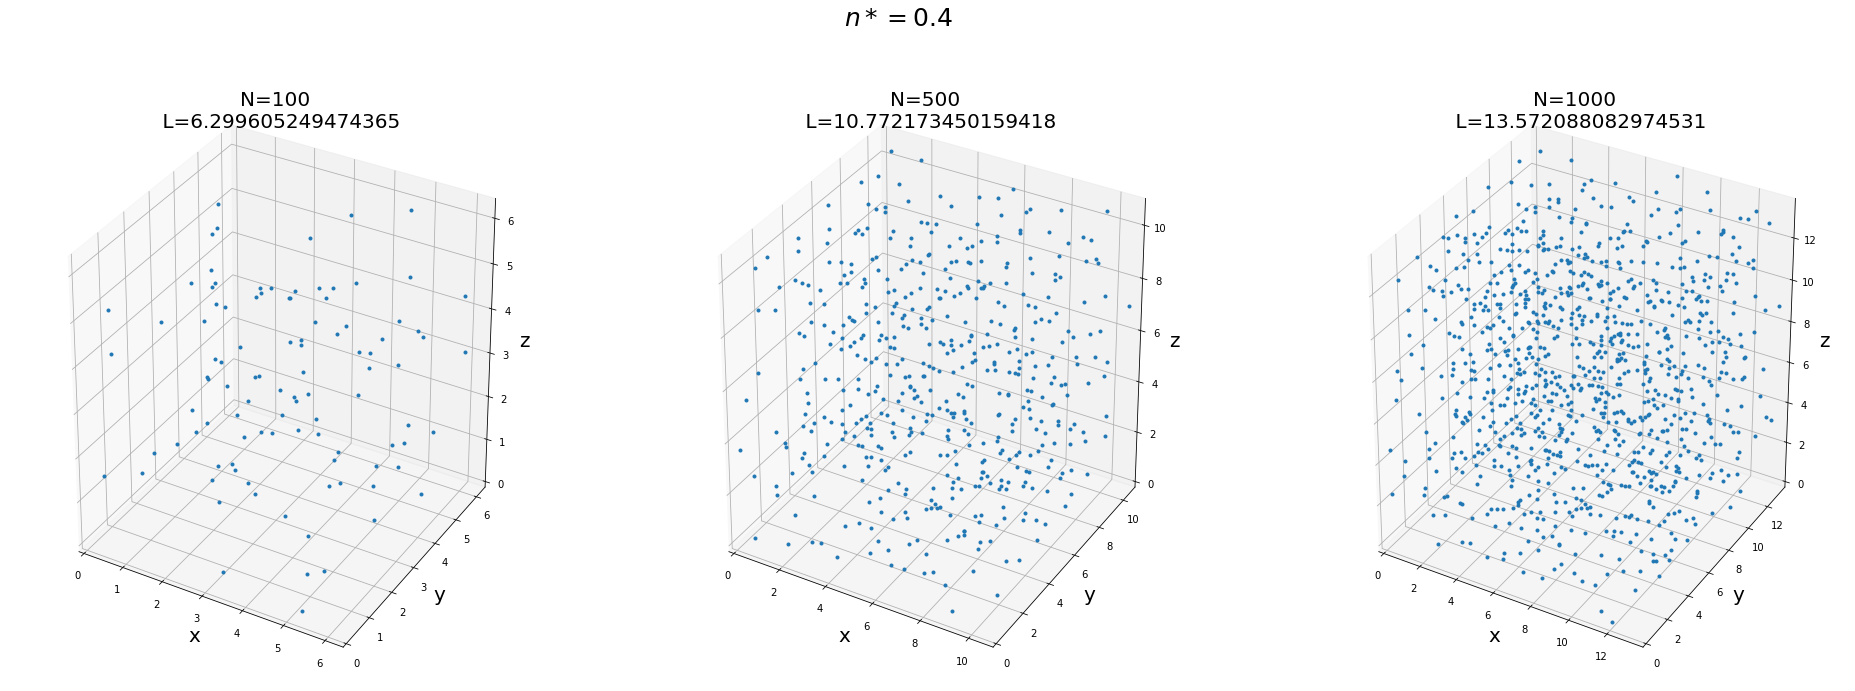

In [42]:
#Se graficaran las funciones obtenidas
fig = plt.figure()
fig.set_size_inches(33, 11)

fig.suptitle("$n*=0.4$", size=25)

ax1 = fig.add_subplot(1,3,1, projection="3d")
ax1.plot(d100["x"], d100["y"], d100["z"], ".")
ax1.set_title("N=100 \n L="+str(L_bi(0.4,100,3)), size=20)
ax1.set_ylabel("y", size=20)
ax1.set_xlabel("x", size=20)
ax1.set_zlabel("z", size=20)
ax1.set_xlim(0,L_bi(0.4,100,3))
ax1.set_ylim(0,L_bi(0.4,100,3))
ax1.set_zlim(0,L_bi(0.4,100,3))


ax2 = fig.add_subplot(1,3,2, projection="3d")
ax2.plot(d500["x"], d500["y"], d500["z"], ".")
ax2.set_title("N=500 \n L="+str(L_bi(0.4,500,3)), size=20)
ax2.set_ylabel("y", size=20)
ax2.set_xlabel("x", size=20)
ax2.set_zlabel("z", size=20)
ax2.set_xlim(0,L_bi(0.4,500,3))
ax2.set_ylim(0,L_bi(0.4,500,3))
ax2.set_zlim(0,L_bi(0.4,500,3))

ax3 = fig.add_subplot(1,3,3, projection="3d")
ax3.plot(d1000["x"], d1000["y"], d1000["z"], ".")
ax3.set_title("N=1000 \n L="+str(L_bi(0.4,1000,3)), size=20)
ax3.set_ylabel("y", size=20)
ax3.set_xlabel("x", size=20)
ax3.set_zlabel("z", size=20)
ax3.set_xlim(0,L_bi(0.4,1000,3))
ax3.set_ylim(0,L_bi(0.4,1000,3))
ax3.set_zlim(0,L_bi(0.4,1000,3))

plt.show()

b) Gráficas para número de partículas fijo en $N=500$, $n*= 0.2,0.6,0.8$ y $dim=3$.

In [43]:
#Valores para N=500
#con n*=0.2
d02 = caja(3,0.2,500,3)
#con n*=0.6
d06 = caja(3,0.6,500,3)
#con n*=0.8
d08 = caja(3,0.8,500,3)

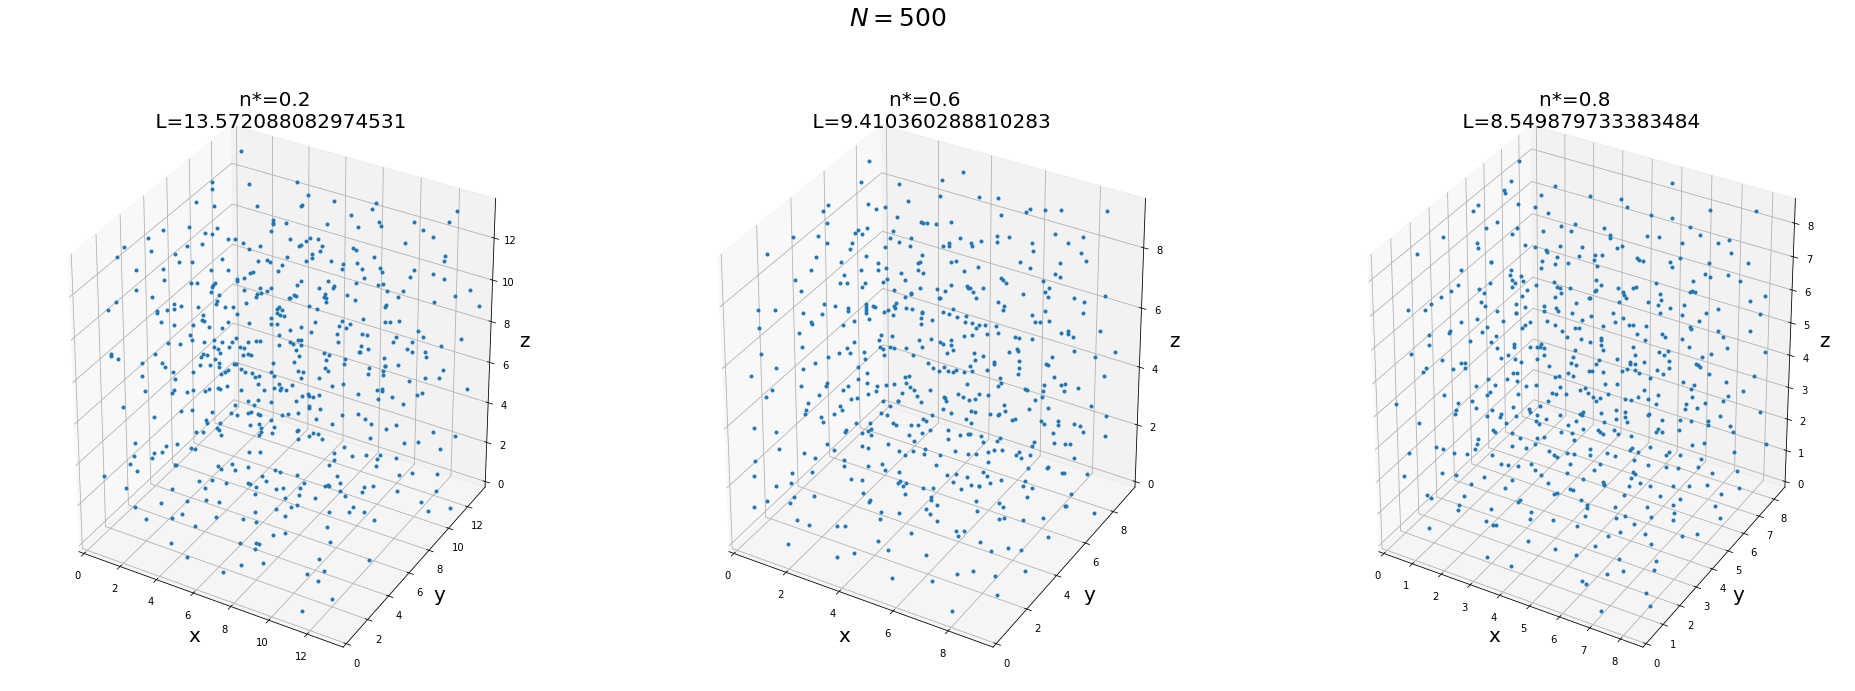

In [65]:
#Se graficaran las funciones obtenidas
fig = plt.figure()
fig.set_size_inches(33, 11)

fig.suptitle("$N=500$", size=25)

ax1 = fig.add_subplot(1,3,1, projection="3d")
ax1.plot(d02["x"], d02["y"], d02["z"], ".")
ax1.set_title("n*=0.2 \n L="+str(L_bi(0.2,500,3)), size=20)
ax1.set_ylabel("y", size=20)
ax1.set_xlabel("x", size=20)
ax1.set_zlabel("z", size=20)
ax1.set_xlim(0,L_bi(0.2,500,3))
ax1.set_ylim(0,L_bi(0.2,500,3))
ax1.set_zlim(0,L_bi(0.2,500,3))


ax2 = fig.add_subplot(1,3,2, projection="3d")
ax2.plot(d06["x"], d06["y"], d06["z"], ".")
ax2.set_title("n*=0.6 \n L="+str(L_bi(0.6,500,3)), size=20)
ax2.set_ylabel("y", size=20)
ax2.set_xlabel("x", size=20)
ax2.set_zlabel("z", size=20)
ax2.set_xlim(0,L_bi(0.6,500,3))
ax2.set_ylim(0,L_bi(0.6,500,3))
ax2.set_zlim(0,L_bi(0.6,500,3))

ax3 = fig.add_subplot(1,3,3, projection="3d")
ax3.plot(d08["x"], d08["y"], d08["z"], ".")
ax3.set_title("n*=0.8 \n L="+str(L_bi(0.8,500,3)), size=20)
ax3.set_ylabel("y", size=20)
ax3.set_xlabel("x", size=20)
ax3.set_zlabel("z", size=20)
ax3.set_xlim(0,L_bi(0.8,500,3))
ax3.set_ylim(0,L_bi(0.8,500,3))
ax3.set_zlim(0,L_bi(0.8,500,3))

plt.show()